# Logistic Regression with Fixed Basis Functions and the IRLS Algorithm

In [57]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.random import multivariate_normal, seed
from branca.colormap import LinearColormap

In [2]:
%config InlineBackend.figure_format = "retina"

In [3]:
seed(1643)

S1 = np.array([
    [.05, 0],
    [0, 0.05]
])


S2 = np.array([
    [.05, 0],
    [0, .07]
])


x1 = multivariate_normal([0, 0], S1, 50)

x2_1 = multivariate_normal([-1.5, -1.5], S2, 50)
x2_2 = multivariate_normal([1.5, 1.5], S2, 50)
x2 = np.r_[x2_1, x2_2]

In [4]:
def phi(x, m, s):
    return np.exp(-(x - m) ** 2 / s)

phi2 = np.c_[phi(x2[:, 0], 0, 1.4), phi(x2[:, 1], 1, 1.2)]
phi1 = np.c_[phi(x1[:, 0], 0, 1.4), phi(x1[:, 1], 1, 1.2)]

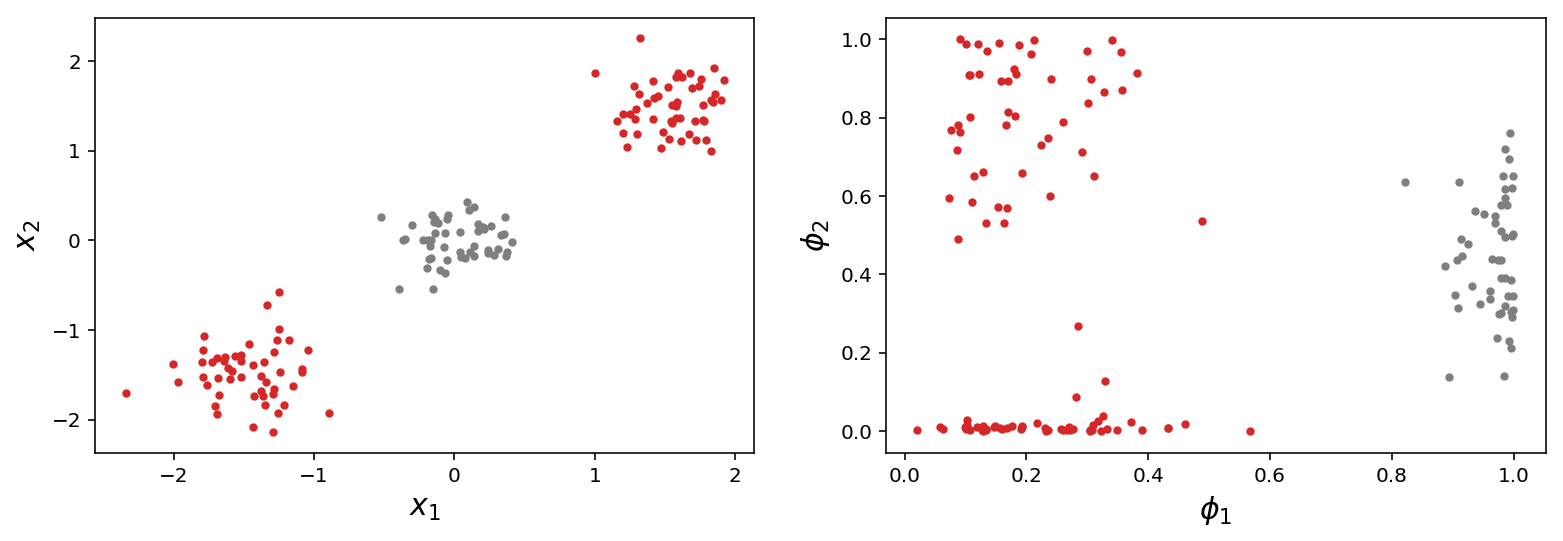

In [5]:
fig, ax = plt.subplots(1, 2, figsize=(13, 4))
ax[0].scatter(*x1.T, s=10, c="tab:gray")
ax[0].scatter(*x2.T, c="tab:red", s=10)
ax[0].set_xlabel("$x_1$", fontsize=15)
ax[0].set_ylabel("$x_2$", fontsize=15)

ax[1].scatter(*phi1.T, c="tab:gray", s=10)
ax[1].scatter(*phi2.T, c="tab:red", s=10)
ax[1].set_xlabel("$\phi_1$", fontsize=15)
ax[1].set_ylabel("$\phi_2$", fontsize=15);

The cross-entropy loss for a two class problem is defined as the negative log-likelihood function of a Bernoulli random variable, where the probability is defined in terms of a weight vector $\bf w$ and an input vector $\bf x$:

$$
    E({\bf w}) = - \sum_{n=1}^N t_n \log\left(\sigma({\bf w}^T{\bf x})\right) + (1 - t_n) \log\left(1 - 
    \sigma({\bf w}^T{\bf x})\right)
$$

-------

## An approximation to the sigmoid function given by the probit functio

The sigmoid function is given by
$$
   \sigma(z) = \frac{1}{1 + e^{-z}} 
$$

on the other hand, the probit function is defined as
$$
    \Phi(z) = \int_{-\infty}^z \mathcal{N}(x | 0, 1) dx,
$$

Where $\Phi(z)$ can be evaluated considering the error function
$$
    \text{erf}(z) = \frac{2}{\sqrt\pi} \int_0^z e^{-\theta^2 / 2} d\theta
$$

via the relationship

$$
    \Phi(a) = \frac{1}{2}\left(1 + \frac{1}{\sqrt{2}}\text{erf}(a)\right)
$$

In [7]:
from scipy.special import erf

def sigmoid(z): return 1 / (1 + np.exp(-z))
def Phi(z): return (1 + erf(z) / np.sqrt(2)) / 2

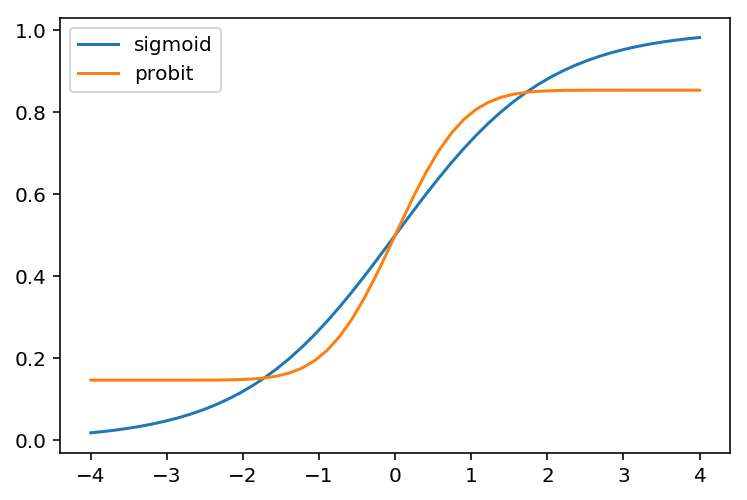

In [50]:
xrange = np.linspace(-4, 4)
plt.plot(xrange, sigmoid(xrange), label="sigmoid")
plt.plot(xrange, Phi(xrange), label="probit")
plt.legend()

To approximate $\sigma$, we consider a scaled version of the probit function $\Phi$.

In [53]:
cm = LinearColormap(["blue", "teal"], vmin=0.1, vmax=0.5)

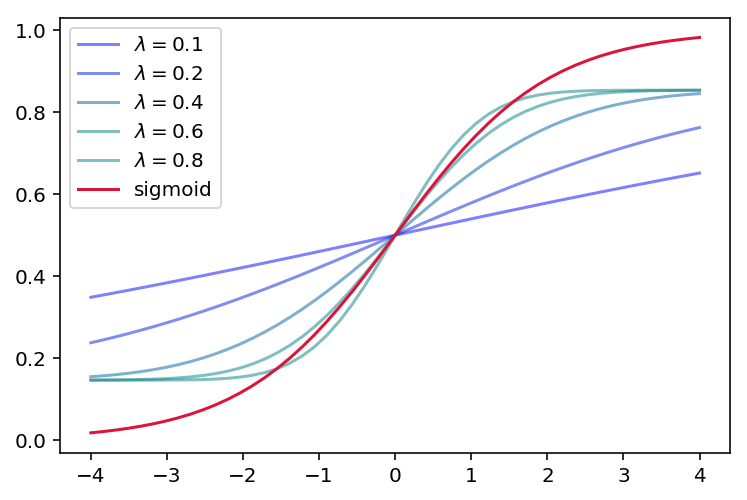

In [61]:
lambdas = [0.1, 0.2, 0.4, 0.6, 0.8]
for l in lambdas:
    plt.plot(xrange, Phi(xrange * l), c=cm(l), label=r"$\lambda = {}$".format(l), alpha=0.5)
plt.plot(xrange, sigmoid(xrange), label="sigmoid", c="crimson")
plt.legend()